In [1]:
set.seed(1987)
n <- 100
k <- 8
Sigma <- 64  * matrix(c(1, .75, .5, .75, 1, .5, .5, .5, 1), 3, 3) 
m <- MASS::mvrnorm(n, rep(0, 3), Sigma)
m <- m[order(rowMeans(m), decreasing = TRUE),]
y <- m %x% matrix(rep(1, k), nrow = 1) + matrix(rnorm(matrix(n*k*3)), n, k*3)
colnames(y) <- c(paste(rep("Math",k), 1:k, sep="_"),
                 paste(rep("Science",k), 1:k, sep="_"),
                 paste(rep("Arts",k), 1:k, sep="_"))

In [2]:
install.packages('ggplot2')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


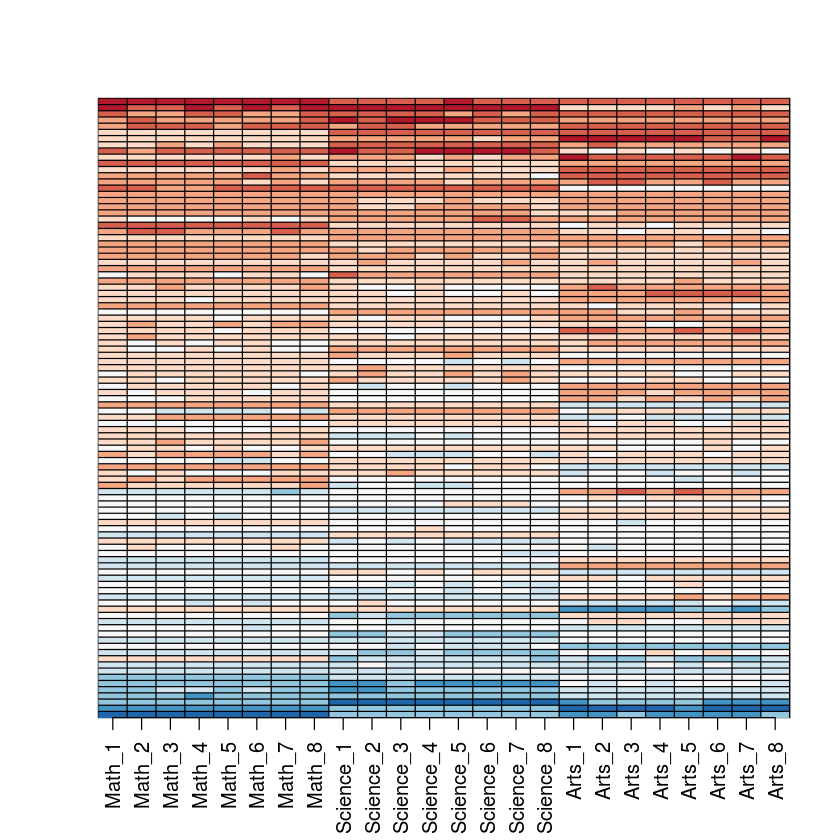

In [3]:
library(ggplot2)

my_image <- function(x, zlim = range(x), ...){
	colors = rev(RColorBrewer::brewer.pal(9, "RdBu"))
	cols <- 1:ncol(x)
	rows <- 1:nrow(x)
	image(cols, rows, t(x[rev(rows),,drop=FALSE]), xaxt = "n", yaxt = "n",
			xlab="", ylab="",  col = colors, zlim = zlim, ...)
	abline(h=rows + 0.5, v = cols + 0.5)
	axis(side = 1, cols, colnames(x), las = 2)
}

my_image(y)

[1] 0.4855371 1.0000000

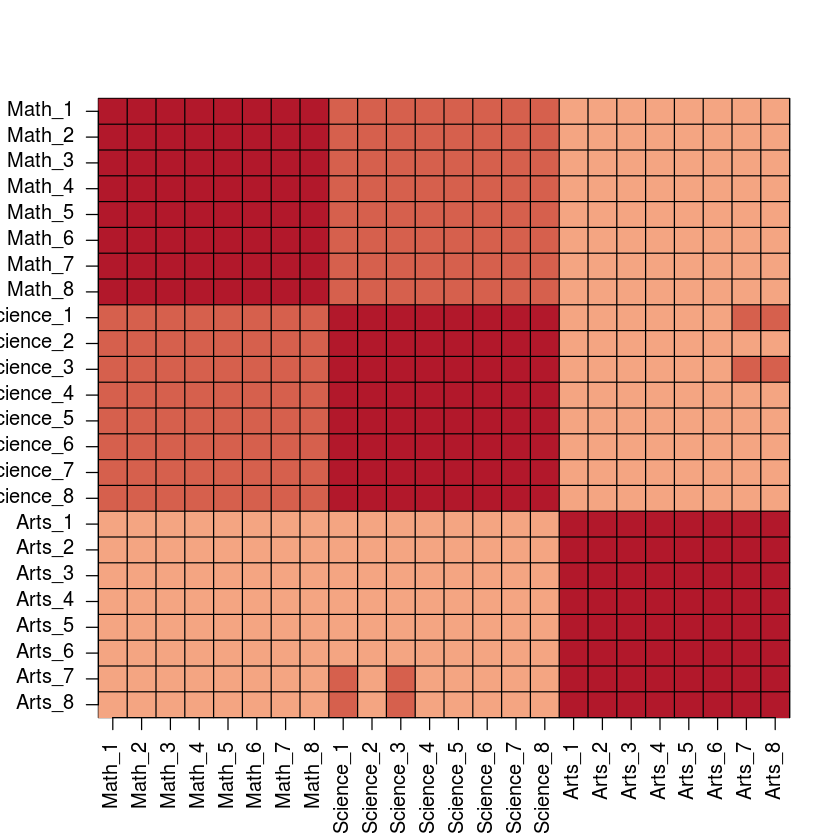

In [4]:
my_image(cor(y), zlim = c(-1,1))
range(cor(y))
axis(side = 2, 1:ncol(y), rev(colnames(y)), las = 2)

In [5]:
s <- svd(y)
names(s)

[1] "d" "u" "v"

In [6]:
y_svd <- s$u %*% diag(s$d) %*% t(s$v)
max(abs(y - y_svd))

[1] 5.329071e-14